#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

## Librerias

In [1]:
import pandas as pd
import numpy as np

import urllib.request
from PIL import Image

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix

## Data

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
train = pd.read_csv("data/train.csv")


In [3]:
test= pd.read_csv("data/test.csv")

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31442 entries, 0 to 31441
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    31442 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  31442 non-null  float64
 2   age                                   31442 non-null  object 
 3   NumberOfTime30-59DaysPastDueNotWorse  31442 non-null  int64  
 4   DebtRatio                             31442 non-null  float64
 5   MonthlyIncome                         25228 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       31442 non-null  int64  
 7   NumberOfTimes90DaysLate               31442 non-null  int64  
 8   NumberRealEstateLoansOrLines          31442 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  31442 non-null  int64  
 10  NumberOfDependents                    30635 non-null  float64
dtypes: float64(4), 

## Data exploration

| **Variable   Name**| **Description**| **Type**   |
|--------------------|----------------|------------|
| SeriousDlqin2yrs   | Person   experienced 90 days past due delinquency or worse                                                                                         | *Y/N*      |
| RevolvingUtilizationOfUnsecuredLines | Total   balance on credit cards and personal lines of credit except real estate and   no installment debt like car loans divided by the sum of credit limits | percentage |
| age                                  | Age of borrower in   years                                                                                                                                   | integer    |
| NumberOfTime30-59DaysPastDueNotWorse | Number of times   borrower has been 30-59 days past due but no worse in the last 2 years.                                                                    | integer    |
| DebtRatio                            | Monthly debt   payments, alimony,living costs divided by monthy gross income                                                | percentage |
| MonthlyIncome                        | Monthly income                                                                                                                                               | real       |
| NumberOfOpenCreditLinesAndLoans      | Number of Open loans   (installment like car loan or mortgage) and Lines of credit (e.g. credit   cards)                                                     | integer    |
| NumberOfTimes90DaysLate              | Number of times   borrower has been 90 days or more past due.                                                       | integer    |
| NumberRealEstateLoansOrLines         | Number of mortgage   and real estate loans including home equity lines of credit                           | integer    |
| NumberOfTime60-89DaysPastDueNotWorse | Number of times   borrower has been 60-89 days past due but no worse in the last 2 years.                                                                    | integer    |
| NumberOfDependents                   | Number of dependents   in family excluding themselves (spouse, children etc.)                                     | integer    |

The **SeriousDlqin2yrs** is the dependent variable of the dataset, or better named the **label**. This is a boolean value which details if a certain individual has experienced a deliquency of 90 days past due or worse in the last 2 years.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [6]:
train.head()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768219,68y,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52y,0,0.385497,3750.0,16,0,1,0,1.0
2,108917,0,0.000000,54y,0,0.346503,6833.0,8,0,1,0,0.0
3,99039,0,0.046064,66y,1,0.407614,5200.0,6,0,1,0,1.0
4,116168,0,0.168771,45y,0,4702.000000,NaN,10,0,3,0,1.0


In [7]:
train.tail()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
73358,25055,0,0.010468,45y,0,0.211663,12500.0,15,0,1,0,3.0
73359,105554,0,0.131250,42y,0,0.311538,5000.0,9,0,0,0,0.0
73360,129050,0,0.550527,59y,0,2777.000000,NaN,12,0,1,0,0.0
73361,94633,0,0.678651,31y,0,0.436990,3800.0,12,0,1,0,0.0
73362,88136,0,0.136699,58y,0,0.179301,16000.0,16,0,2,0,0.0


In [8]:
train.dtypes

Id                                        int64
target                                    int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                      object
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [9]:
train.duplicated().sum()

0

In [10]:
train.isna().sum()

Id                                          0
target                                      0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           14567
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       1942
dtype: int64

In [11]:
train.describe()

,Id,target,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,5.879600e+04,73363.000000,73363.000000,73363.000000,73363.000000,71421.000000
mean,75035.459564,0.065919,5.884904,0.410507,359.752537,6.649145e+03,8.443916,0.256546,1.019928,0.231847,0.755506
std,43303.736606,0.248142,235.508449,4.090014,2477.648064,1.046163e+04,5.142232,4.066573,1.136357,4.052280,1.111715
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37449.000000,0.000000,0.029752,0.000000,0.173446,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75032.000000,0.000000,0.154688,0.000000,0.365737,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112628.500000,0.000000,0.558686,0.000000,0.863514,8.300000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149998.000000,1.000000,29110.000000,98.000000,329664.000000,1.560100e+06,57.000000,98.000000,32.000000,98.000000,13.000000


In [12]:
train['dataset'] = 'train'
test['dataset'] = 'test'

In [13]:
df = pd.concat([train, test], ignore_index=True)

In [14]:
df.tail()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,dataset
104800,110527,NaN,0.469451,28y,0,0.029072,2166.0,1,0,0,0,0.0,test
104801,121978,NaN,0.171910,44y,0,0.375557,5833.0,8,0,2,0,4.0,test
104802,77327,NaN,0.004842,51y,1,30.000000,0.0,3,0,0,0,2.0,test
104803,48341,NaN,0.636554,42y,0,0.483931,7000.0,10,2,1,0,1.0,test
104804,37695,NaN,0.011406,53y,0,2813.000000,NaN,17,0,1,0,0.0,test


## Data processing

In [15]:
df.rename(columns=lambda x: x.lower(), inplace=True)

### **Metodología**

* id--> el id

* target--> si se concede el crédito o no

* revolvingutilizationofunsecuredlines--> Saldo total de tarjetas de crédito y líneas de crédito personales, excepto bienes raíces y deuda sin cuotas, como préstamos para automóviles, dividido por la suma de los límites de crédito (porcentaje)

* age--> edad del prestatario

* numberoftime30-59dayspastduenotworse--> Número de veces que el prestatario ha estado en mora entre 30 y 59 días, pero no ha empeorado en los últimos 2 años

* debtratio--> Pagos mensuales de deuda, pensión alimenticia, costos de vida divididos por el ingreso bruto mensual (porcentaje)

* monthlyincome--> ingreso mensual

* numberofopencreditlinesandloans--> Número de préstamos abiertos (a plazos, como préstamos para automóviles o hipotecas) y líneas de crédito (por ejemplo, tarjetas de crédito)

* numberoftimes90dayslate--> Número de veces que el prestatario ha estado vencido por 90 días o más

* numberrealestateloansorlines--> Número de préstamos hipotecarios y inmobiliarios, incluidas líneas de crédito sobre el valor líquido de la vivienda

* numberoftime60-89dayspastduenotworse --> Número de veces que el prestatario ha estado en mora entre 60 y 89 días, pero no ha empeorado en los últimos 2 años.

* NumberOfDependents --> Número de dependientes de la familia excluidos ellos mismos (cónyuge, hijos, etc.)


In [16]:
#Columna age
df['age'] = df['age'].str.extract('(\d+)').astype(int)

In [17]:
df.columns

Index(['id', 'target', 'revolvingutilizationofunsecuredlines', 'age',
       'numberoftime30-59dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime60-89dayspastduenotworse',
       'numberofdependents', 'dataset'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104805 entries, 0 to 104804
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    104805 non-null  int64  
 1   target                                73363 non-null   float64
 2   revolvingutilizationofunsecuredlines  104805 non-null  float64
 3   age                                   104805 non-null  int64  
 4   numberoftime30-59dayspastduenotworse  104805 non-null  int64  
 5   debtratio                             104805 non-null  float64
 6   monthlyincome                         84024 non-null   float64
 7   numberofopencreditlinesandloans       104805 non-null  int64  
 8   numberoftimes90dayslate               104805 non-null  int64  
 9   numberrealestateloansorlines          104805 non-null  int64  
 10  numberoftime60-89dayspastduenotworse  104805 non-null  int64  
 11  

# **EDA**

In [19]:
def univariante_analysis(df, column):
        mean = df[column].mean()
        median = df[column].median()

        plt.figure(figsize=(10, 5))

        # Boxplot
        sns.boxplot(x=df[column])

        # Líneas para la media y mediana
        plt.axvline(mean, color='g', linestyle='-', label=f'Mean={mean:.1f}')
        plt.axvline(median, color='r', linestyle='-', label=f'Median={median:.1f}')

        plt.legend()
        plt.title(f'Análisis Univariante de {column}')
        plt.xlabel(column)
        
        plt.show()

In [20]:
def atipicos(colum):
    Q1 = df[f'{colum}'].quantile(0.25)
    Q3 = df[f'{colum}'].quantile(0.75)
    IQR = Q3 - Q1

    # Definiendo límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificación de outliers
    outliers = df[(df[f'{colum}'] < lower_bound) | (df[f'{colum}'] > upper_bound)]
    
    return outliers

In [21]:
#Age

In [22]:
df[df['age'] < 18]

,id,target,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents,dataset
66371,65695,0.0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,train


In [23]:
df = df.drop(df[df['age'] < 18].index)

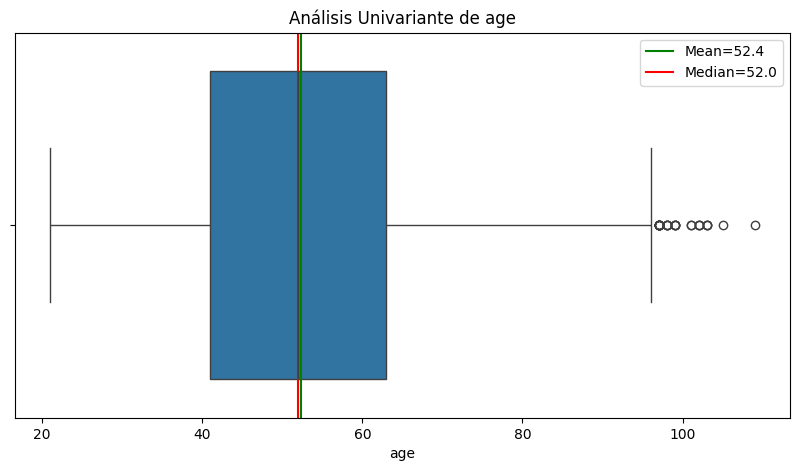

In [24]:
univariante_analysis(df, 'age')

In [25]:
atipicos('age')

,id,target,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents,dataset
578,24007,0.0,0.000843,99,0,0.000000,NaN,4,0,0,0,NaN,train
5089,108364,0.0,0.000000,98,0,0.096361,2500.0,6,0,0,0,0.0,train
6663,56761,0.0,0.003469,105,0,2.000000,NaN,4,0,0,0,NaN,train
8888,135025,0.0,0.004059,103,0,5.000000,NaN,6,0,0,0,0.0,train
9118,25561,0.0,0.009866,102,0,0.002424,3300.0,3,0,0,0,0.0,train
11682,136327,0.0,0.137748,97,0,0.201234,5833.0,12,0,0,0,0.0,train
21238,111408,0.0,0.016516,97,0,0.008581,1747.0,2,0,0,0,0.0,train
23707,110604,0.0,0.001583,97,0,0.001999,1500.0,15,0,0,1,0.0,train
25713,28870,0.0,1.000000,97,0,0.000000,NaN,1,0,0,0,NaN,train
28449,96450,0.0,0.109642,102,0,0.273844,3417.0,7,0,0,0,1.0,train


<Axes: >

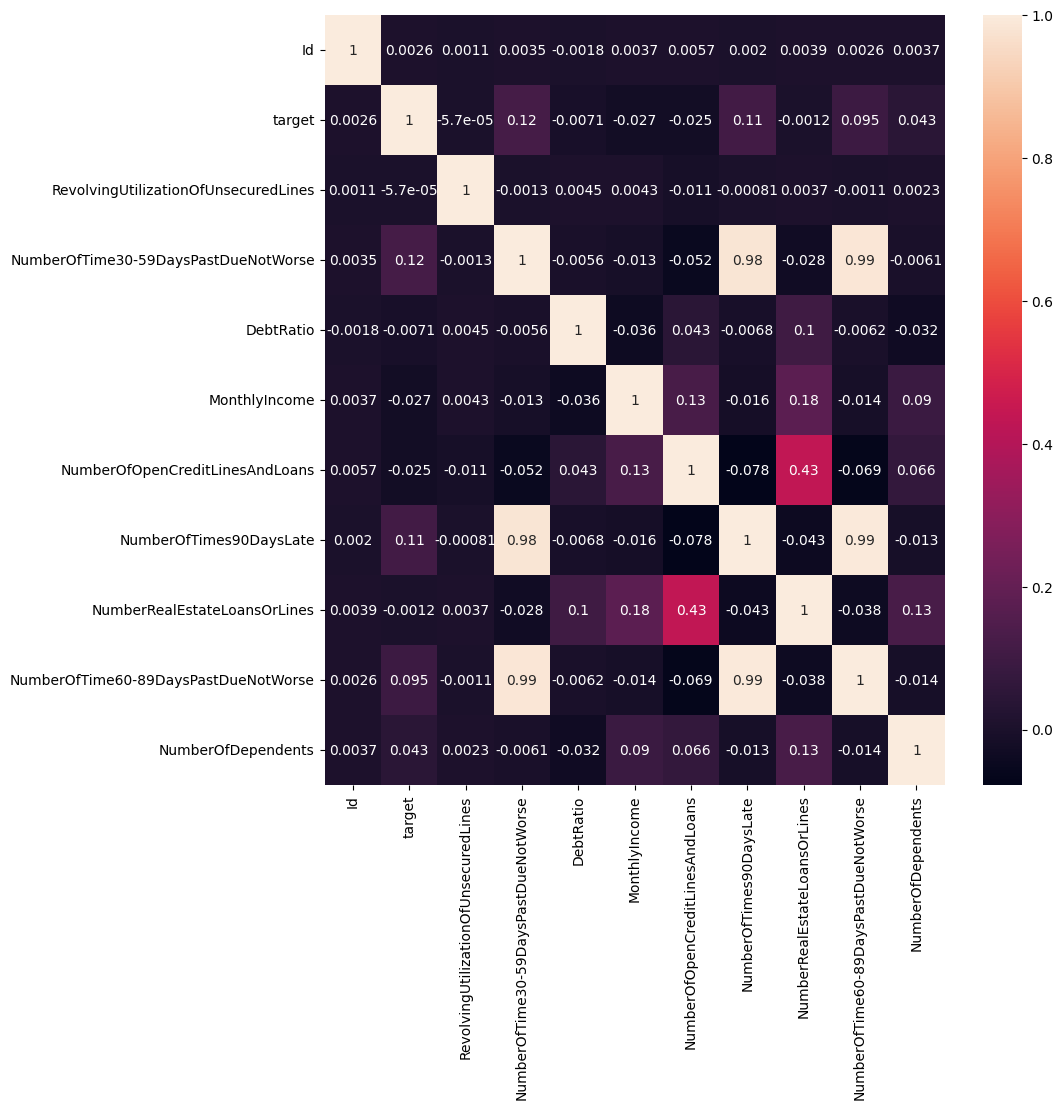

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(numeric_only=True), annot=True)

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'RevolvingUtilizationOfUnsecuredLines'}>],
       [<Axes: title={'center': 'NumberOfTime30-59DaysPastDueNotWorse'}>,
        <Axes: title={'center': 'DebtRatio'}>,
        <Axes: title={'center': 'MonthlyIncome'}>],
       [<Axes: title={'center': 'NumberOfOpenCreditLinesAndLoans'}>,
        <Axes: title={'center': 'NumberOfTimes90DaysLate'}>,
        <Axes: title={'center': 'NumberRealEstateLoansOrLines'}>],
       [<Axes: title={'center': 'NumberOfTime60-89DaysPastDueNotWorse'}>,
        <Axes: title={'center': 'NumberOfDependents'}>, <Axes: >]],
      dtype=object)

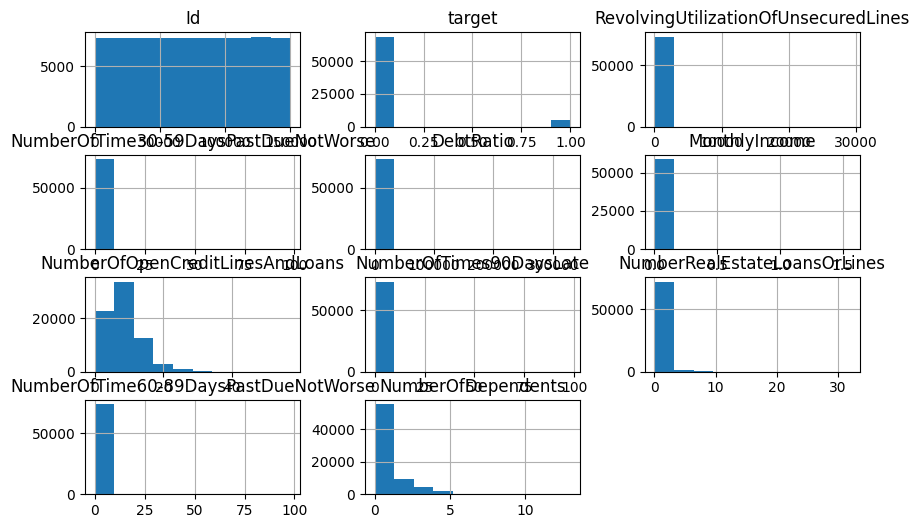

In [27]:
train.hist(figsize=(10,6))

In [28]:
#Target

<Axes: xlabel='target', ylabel='count'>

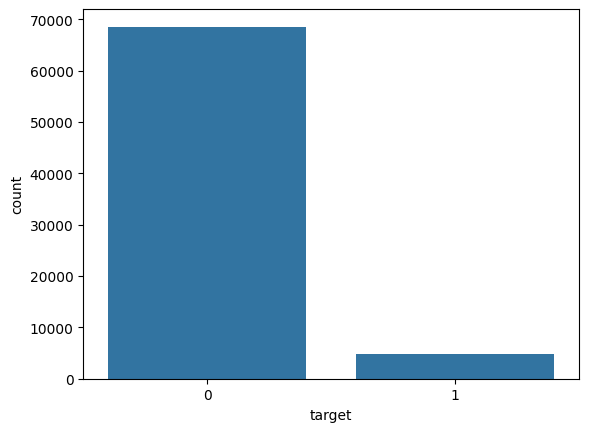

In [29]:
sns.countplot(x='target',data= train)

In [30]:
train['target'].value_counts()

target
0    68527
1     4836
Name: count, dtype: int64

In [31]:
df.head()

,id,target,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents,dataset
0,44164,0.0,0.768219,68,1,0.687930,2178.0,12,0,1,0,0.0,train
1,95356,0.0,0.289873,52,0,0.385497,3750.0,16,0,1,0,1.0,train
2,108917,0.0,0.000000,54,0,0.346503,6833.0,8,0,1,0,0.0,train
3,99039,0.0,0.046064,66,1,0.407614,5200.0,6,0,1,0,1.0,train
4,116168,0.0,0.168771,45,0,4702.000000,NaN,10,0,3,0,1.0,train


In [32]:
df[df['revolvingutilizationofunsecuredlines'] > 4]

,id,target,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents,dataset
361,36548,0.0,4.937063,33,0,0.766168,3540.0,12,2,1,0,0.0,train
1513,38813,0.0,760.000000,63,0,0.060828,3550.0,2,0,0,0,0.0,train
1862,8199,0.0,9340.000000,62,0,0.186908,8233.0,2,0,1,0,3.0,train
1906,88304,0.0,4133.000000,34,0,1.039990,4000.0,7,0,2,0,4.0,train
2530,73919,0.0,949.000000,73,0,37.000000,NaN,8,0,0,0,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,60991,NaN,5451.000000,39,0,0.734195,6500.0,4,0,1,0,1.0,test
103724,72405,NaN,4.443419,51,0,872.000000,NaN,6,0,0,1,0.0,test
103949,50198,NaN,798.000000,62,0,1100.000000,NaN,4,0,1,0,0.0,test
104382,90853,NaN,1778.000000,34,0,0.204975,4180.0,8,0,0,0,2.0,test


In [33]:
unique_values = df['revolvingutilizationofunsecuredlines'].unique()

# Convertir el array en una lista e imprimir los valores uno por uno
unique_values_list = list(unique_values)
for value in unique_values_list:
    print(value)

0.7682191279999999
0.289873145
0.0
0.0460637729999999
0.168770781
0.0476613709999999
0.061963381
0.997422337
0.05957738
0.911480247
0.397704381
0.082861143
0.17379131
0.01958154
0.165723968
0.9999999
0.036310231
0.376023546
0.102410655
0.631909055
0.381907001
0.002405774
0.671719895
0.05122967
0.055160482
0.954045954
0.189281475
0.7468094470000001
0.757638204
0.00325045
0.571385189
0.081756124
0.334148232
0.019160631
1.3023255809999998
0.086661414
0.171689759
0.4757894029999999
0.002736503
0.943148197
0.024242503
0.339016131
0.0508271509999999
0.244732482
0.018375545
0.33303176
0.041857543
0.036800444
0.154721165
0.944579346
0.223243747
0.308684566
0.297376705
0.011558693
0.002039189
0.239388736
0.020642878
0.52090943
0.122848822
0.03809763
0.002036527
0.00916079
0.138431305
0.002469377
0.00504453
0.011941036
0.032039495
0.140517653
0.078126512
0.7073045929999999
0.8883889509999999
0.001535323
0.003835782
0.182627504
0.3420558079999999
0.103368713
0.025155464
0.03390962
0.031660564
0.3

## **Missing y atípicos**

-----------------------------------------------------------------------------------------------------------------

In [34]:
train.isna().sum()

Id                                          0
target                                      0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           14567
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       1942
dataset                                     0
dtype: int64

In [35]:
median_dependents_by_age = df.groupby('age')['numberofdependents'].median()

In [36]:
median_dependents_by_age

age
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
      ... 
101    0.0
102    0.0
103    0.0
105    NaN
109    NaN
Name: numberofdependents, Length: 84, dtype: float64

In [37]:
df['numberofdependents'] = df['numberofdependents'].fillna(df['age'].map(median_dependents_by_age))

In [38]:
df['numberofdependents'] = df['numberofdependents'].fillna(df['numberofdependents'].median())

In [39]:
# Calcula la mediana de 'monthlyincome' agrupado por 'debtratio'
median_income_by_debtratio = df.groupby('debtratio')['monthlyincome'].median()

# Rellena los NaN en 'monthlyincome' con los valores de la mediana calculados para cada debtratio
df['monthlyincome'] = df['monthlyincome'].fillna(df['debtratio'].map(median_income_by_debtratio))


In [40]:
df['monthlyincome'] = df['monthlyincome'].fillna(df['monthlyincome'].median())

In [41]:
df.isna().sum()

id                                          0
target                                  31442
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime30-59dayspastduenotworse        0
debtratio                                   0
monthlyincome                               0
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime60-89dayspastduenotworse        0
numberofdependents                          0
dataset                                     0
dtype: int64

## Pasos que si o si debéis realizar para poder participar en la competición:

In [42]:
df.describe()

,id,target,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
count,104804.000000,73362.000000,104804.000000,104804.000000,104804.000000,104804.000000,1.048040e+05,104804.000000,104804.000000,104804.000000,104804.000000,104804.000000
mean,75013.799779,0.065920,5.602058,52.351628,0.416072,354.862851,5.997142e+03,8.454878,0.259990,1.019541,0.235573,0.741102
std,43324.240184,0.248143,217.390912,14.765129,4.139310,2169.192928,1.412160e+04,5.128005,4.115613,1.136849,4.101283,1.103025
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37507.500000,0.000000,0.029800,41.000000,0.000000,0.175023,3.092000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,74931.500000,0.000000,0.153983,52.000000,0.000000,0.366618,5.000000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112620.250000,0.000000,0.559153,63.000000,0.000000,0.867293,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,13.000000


In [43]:
#Columnas a escalar:
from sklearn.preprocessing import RobustScaler

# Suponiendo que 'df' es tu DataFrame

# Columnas a escalar
columns_to_scale = ['revolvingutilizationofunsecuredlines', 'age', 'numberoftime30-59dayspastduenotworse',
                    'debtratio', 'monthlyincome', 'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
                    'numberrealestateloansorlines', 'numberoftime60-89dayspastduenotworse', 'numberofdependents']

# Inicializar RobustScaler
scaler = RobustScaler()

# Escalar las columnas seleccionadas
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [44]:
df.describe()

,id,target,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
count,104804.000000,73362.000000,104804.000000,104804.000000,104804.000000,104804.000000,104804.000000,104804.000000,104804.000000,104804.000000,104804.000000,104804.000000
mean,75013.799779,0.065920,10.291963,0.015983,0.416072,512.077549,0.231463,0.075813,0.259990,0.009771,0.235573,0.741102
std,43324.240184,0.248143,410.673337,0.671142,4.139310,3133.446550,3.277994,0.854668,4.115613,0.568424,4.101283,1.103025
min,1.000000,0.000000,-0.290890,-1.409091,0.000000,-0.529588,-1.160631,-1.333333,0.000000,-0.500000,0.000000,0.000000
25%,37507.500000,0.000000,-0.234594,-0.500000,0.000000,-0.276764,-0.442897,-0.500000,0.000000,-0.500000,0.000000,0.000000
50%,74931.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,112620.250000,0.000000,0.765406,0.500000,0.000000,0.723236,0.557103,0.500000,0.000000,0.500000,0.000000,1.000000
max,149999.000000,1.000000,54991.432188,2.590909,98.000000,476206.316818,697.249304,8.333333,98.000000,26.500000,98.000000,13.000000


### 1. Definir X e y

In [45]:
#Separacion train-test
train = df[df['dataset'] == 'train']
test = df[df['dataset'] == 'test']

In [46]:
#Borramos columna price de test y dataset de ambas
del test['target']
del test['dataset']
del train['dataset']

### 2. Dividir X_train, X_test, y_train, y_test

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = train.drop(['target'], axis=1)
y = train['target']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [50]:
y_train.head()

38793    0.0
50250    0.0
59828    1.0
64870    0.0
53246    0.0
Name: target, dtype: float64

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint
from sklearn.metrics import make_scorer, f1_score

# Define la métrica de evaluación (F1 Score macro)
scorer = make_scorer(f1_score, average='macro')

# Inicializa el modelo Gradient Boosting
gb_model = GradientBoostingClassifier()

# Define los rangos de hiperparámetros que deseas explorar
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializa la búsqueda aleatoria con validación cruzada
random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=50, cv=5, scoring=scorer)

# Entrena la búsqueda aleatoria en tus datos
random_search.fit(X_train, y_train)

# Obtiene los mejores hiperparámetros encontrados
best_params = random_search.best_params_

# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(best_params)

KeyboardInterrupt: 

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Suponiendo que 'X_train' y 'y_train' son tus conjuntos de entrenamiento

# Inicializar el modelo Gradient Boosting
gb_model = GradientBoostingClassifier()

# Entrenar el modelo con el conjunto de entrenamiento
gb_model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de datos de prueba
y_pred_test_gb = gb_model.predict(X_test)

# Calcular el F1 Score macro en el conjunto de datos de prueba
f1_macro_test_gb = f1_score(y_test, y_pred_test_gb, average='macro')

# Imprimir el F1 Score macro en el conjunto de datos de prueba
print(f"F1 Score macro en conjunto de prueba (Gradient Boosting): {f1_macro_test_gb:.4f}")


F1 Score macro en conjunto de prueba (Gradient Boosting): 0.6282


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
scorer = make_scorer(f1_score, average='macro')
"""
# Inicializar los modelos
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVC', SVC()),
    ('Random Forest', RandomForestClassifier())
]

# Realizar validación cruzada para cada modelo
for name, model in models:
    # Calcular los scores de validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
    
    # Calcular la media de los scores de validación cruzada
    mean_cv_score = cv_scores.mean()
    
    # Imprimir el nombre del modelo y el score medio de validación cruzada
    print(f"{name}: Cross Validation F1 Score (macro) - Mean: {mean_cv_score:.4f}")
    """

'\n# Inicializar los modelos\nmodels = [\n    (\'Decision Tree\', DecisionTreeClassifier()),\n    (\'SVC\', SVC()),\n    (\'Random Forest\', RandomForestClassifier())\n]\n\n# Realizar validación cruzada para cada modelo\nfor name, model in models:\n    # Calcular los scores de validación cruzada\n    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)\n    \n    # Calcular la media de los scores de validación cruzada\n    mean_cv_score = cv_scores.mean()\n    \n    # Imprimir el nombre del modelo y el score medio de validación cruzada\n    print(f"{name}: Cross Validation F1 Score (macro) - Mean: {mean_cv_score:.4f}")\n    '

In [52]:
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Suponiendo que 'X_train' y 'y_train' son tus conjuntos de entrenamiento

# Inicializar el modelo Random Forest
rf_model = RandomForestClassifier()

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1_macro')

# Realizar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)
"""


'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# Suponiendo que \'X_train\' y \'y_train\' son tus conjuntos de entrenamiento\n\n# Inicializar el modelo Random Forest\nrf_model = RandomForestClassifier()\n\n# Definir la cuadrícula de hiperparámetros a buscar\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\n# Inicializar la búsqueda en cuadrícula\ngrid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring=\'f1_macro\')\n\n# Realizar la búsqueda en cuadrícula\ngrid_search.fit(X_train, y_train)\n\n# Obtener el mejor modelo\nbest_rf_model = grid_search.best_estimator_\n\n# Imprimir los mejores hiperparámetros encontrados\nprint("Mejores hiperparámetros:")\nprint(grid_search.best_params_)\n'

### 3. Asignar el modelo (vacío) a una variable


In [53]:

rf_model = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de validación
y_pred_val = rf_model.predict(X_test)

# Calcular la métrica F1 Score macro en el conjunto de validación
f1_macro_val = f1_score(y_test, y_pred_val, average='macro')

# Imprimir la métrica F1 Score macro en el conjunto de validación
print(f"F1 Score macro en conjunto de validación: {f1_macro_val:.4f}")

F1 Score macro en conjunto de validación: 0.6097


### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de AUC.

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

In [52]:
X_pred = test
X_pred.head()

,id,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
73363,15576,-0.193068,0.045455,0.0,-0.516082,-0.639508,-0.833333,0.0,-0.5,0.0,0.0
73364,94308,-0.249078,0.227273,0.0,-0.067974,0.620241,3.000000,0.0,0.0,0.0,2.0
73365,53983,-0.265023,0.727273,0.0,-0.328457,-0.217270,-0.666667,0.0,-0.5,0.0,1.0
73366,61359,-0.255813,1.000000,0.0,-0.502489,1.276695,3.166667,0.0,-0.5,0.0,0.0
73367,71383,-0.274587,0.636364,0.0,12.471108,-1.160631,-0.500000,0.0,-0.5,0.0,0.0


In [ ]:
# Inicializar el modelo Gradient Boosting
gb_model = GradientBoostingClassifier()

# Entrenar el modelo con el conjunto de entrenamiento
gb_model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de datos de prueba
y_pred_test_gb = gb_model.predict(X_test)

# Calcular el F1 Score macro en el conjunto de datos de prueba
f1_macro_test_gb = f1_score(y_test, y_pred_test_gb, average='macro')

# Imprimir el F1 Score macro en el conjunto de datos de prueba
print(f"F1 Score macro en conjunto de prueba (Gradient Boosting): {f1_macro_test_gb:.4f}")

In [53]:
gb_model = GradientBoostingClassifier()

# Entrenar el modelo con todos los datos de entrenamiento
gb_model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de datos de prueba
predictions_submit = gb_model.predict(test)

In [55]:
X_pred

array([0., 0., 0., ..., 0., 0., 0.])

IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [ ]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

In [54]:
df=pd.read_csv('data/sample_submission.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31442 entries, 0 to 31441
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      31442 non-null  int64
 1   target  31442 non-null  int64
dtypes: int64(2)
memory usage: 491.4 KB


**¿Qué es lo que subirás a Kaggle?**

In [56]:

predictions_submit

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
predictions_submit = predictions_submit.astype(int)

In [58]:
for val in predictions_submit:
    print(val)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [73]:
for val in predictions_submit:
    print(val)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [59]:
sample = pd.read_csv("data/sample_submission.csv")

In [75]:
sample.head()

,Id,target
0,15576,0
1,94308,1
2,53983,1
3,61359,1
4,71383,0


In [76]:
sample.shape

(31442, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [60]:
submission = pd.DataFrame({"Id": sample['Id'], "target": predictions_submit})

In [ ]:
submission.head()

In [78]:
submission.shape

(31442, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [61]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.Id.all() == sample.Id.all():
                print("You're ready to submit!")
                submission.to_csv("submission2.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [62]:
chequeator(submission)

You're ready to submit!
